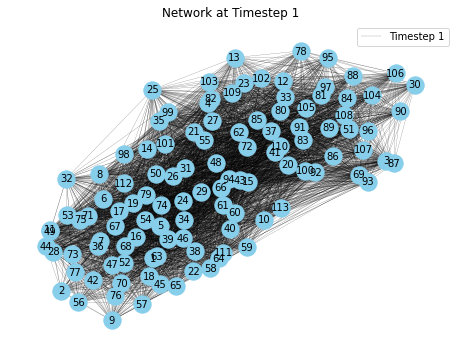

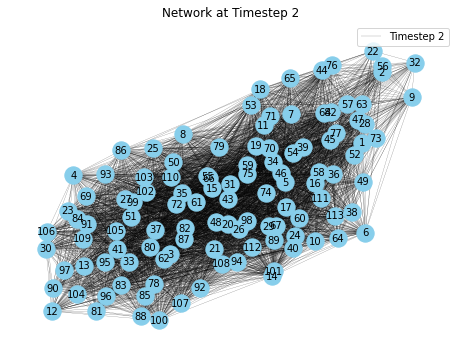

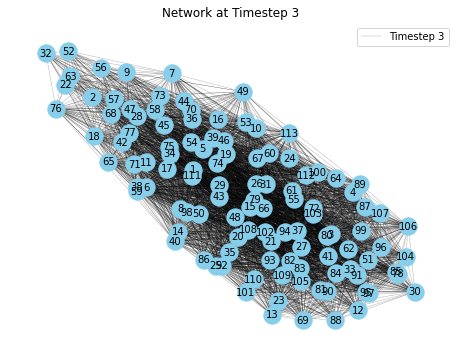

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

filename = 'insecta-ant-colony1.edges'  #specify the path
with open(filename, 'r') as file:
    lines = file.readlines()

G = nx.Graph()
G_arr = []

timesteps_of_interest = [1, 2, 3]

for timestep in timesteps_of_interest:
    plt.figure(figsize=(8, 6))

    for line in lines:
        nodes = line.strip().split() 
        if len(nodes) >= 4:
            node1, node2, weight, current_timestep = nodes[0], nodes[1], nodes[2], int(nodes[3])
            if current_timestep == timestep:
                G.add_edge(node1, node2, weight=weight)
    G_arr.append(G.copy())
    
    pos = nx.spring_layout(G)
    edges = [(u, v) for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=0.2, alpha=0.7, label=f'Timestep {timestep}')
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=300)
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes}, font_size=10, font_color='black')

    plt.title(f'Network at Timestep {timestep}')
    plt.legend()
    plt.axis('off')
    plt.show()
    
    G.clear()

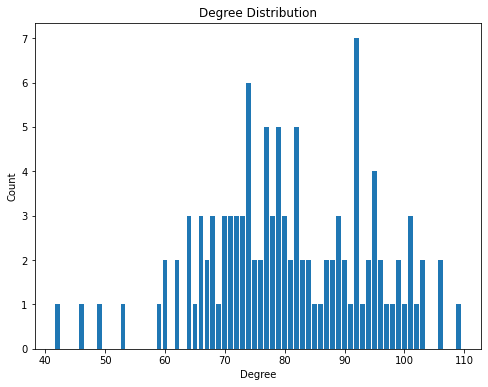

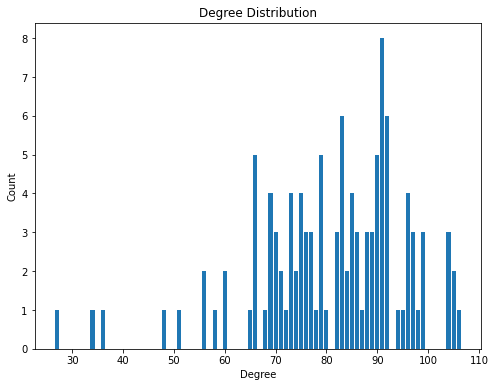

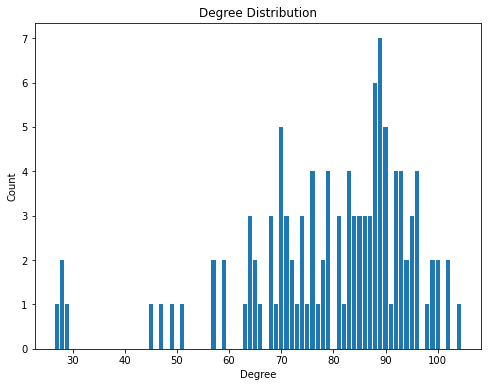

In [18]:
for G in G_arr:
    degrees = dict(G.degree())

    degree_values = sorted(set(degrees.values()))
    degree_counts = [list(degrees.values()).count(deg) for deg in degree_values]

    plt.figure(figsize=(8, 6)) 
    plt.bar(degree_values, degree_counts, width=0.8, align='center')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.title('Degree Distribution')
    plt.show()